# Visão Computacional e Processamento de Imagens
- Prof. Rilder de Sousa Pires
- Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)
- Universidade de Fortaleza
- Aluno : **José Freitas Alves Neto**

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import colorsys

!gdown 1SNzE-EIe0j9CgLaYFGykeZ1dvPPpFNlF
!gdown 1QaqfbaR38jy8pALgZiACW4Dd6I-OgJiG
!gdown 17MYo9AIoUfhFdzA75sFw9cIwxVpNoCSq

Downloading...
From: https://drive.google.com/uc?id=1SNzE-EIe0j9CgLaYFGykeZ1dvPPpFNlF
To: /content/dragon-ball-z-son-goku-portrait-display-son-wallpaper.jpg
100% 344k/344k [00:00<00:00, 6.70MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaqfbaR38jy8pALgZiACW4Dd6I-OgJiG
To: /content/sasuke-story (1).png
100% 706k/706k [00:00<00:00, 9.16MB/s]
Downloading...
From: https://drive.google.com/uc?id=17MYo9AIoUfhFdzA75sFw9cIwxVpNoCSq
To: /content/R.jpeg
100% 311k/311k [00:00<00:00, 6.45MB/s]


# Questão 01
- Implemente as funções de conversão de modelos de cores:

## Item A
- RGB para escala de cinza

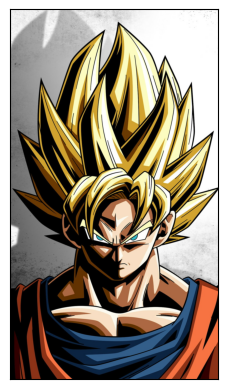

In [2]:
# Convertendo a imagem de BGR para RGB para aplicar a transformação
img = cv.imread('/content/dragon-ball-z-son-goku-portrait-display-son-wallpaper.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

- Criando função de transformação

In [3]:
def transformar_rgb_pra_gray(imagem) -> np.array:
    '''
    Função para transformar imagem RGB em
    escala de cinza
    '''
    nova_imagem = []
    for linha_pixels in imagem:
      array_linha = []
      for r,g,b in linha_pixels:
          novo_pixel_gray = 0.299*r + 0.587*g + 0.114*b
          array_linha.append(round(novo_pixel_gray))
      nova_imagem.append(array_linha)
    return np.array(nova_imagem)

- Aplicando função

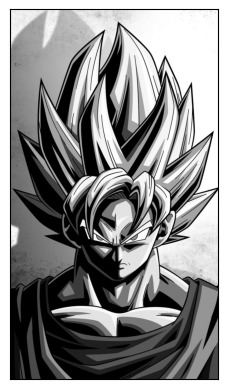

In [4]:
imagem_gray = transformar_rgb_pra_gray(img)
plt.imshow(imagem_gray, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

- Mostrando a similaridade do resultado com do OpenCV

In [5]:
# Imprimido array gerado pela minha função
imagem_gray

array([[237, 237, 235, ..., 254, 249, 249],
       [237, 237, 235, ..., 252, 255, 255],
       [238, 238, 237, ..., 246, 240, 247],
       ...,
       [  0,   0,   0, ...,  71,  71,  71],
       [  1,   1,   1, ...,  74,  74,  74],
       [  3,   3,   3, ...,  79,  79,  79]])

In [6]:
# Imprimindo array gerado pelo open cv
img = cv.imread('/content/dragon-ball-z-son-goku-portrait-display-son-wallpaper.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img

array([[237, 237, 235, ..., 254, 249, 249],
       [237, 237, 235, ..., 252, 255, 255],
       [238, 238, 237, ..., 246, 240, 247],
       ...,
       [  0,   0,   0, ...,  71,  71,  71],
       [  1,   1,   1, ...,  74,  74,  74],
       [  3,   3,   3, ...,  79,  79,  79]], dtype=uint8)

## Item B
- RGB para CMYK

In [7]:
def transformar_rgb_to_cmyk(imagem) -> np.array:
    '''
    Função para transformar imagem RGB em
    escala de CMYK
    '''
    nova_imagem = []
    for linha_pixels in imagem:
      array_linha = []
      for r,g,b in linha_pixels:
          r_ = r/255
          g_ = g/255
          b_ = b/255
          # Configurando coloração CMYK
          k = (1 - max(r_,g_,b_))
          if k != 1:
            c = (1 - r_ -k)/(1-k)
            m = (1 - g_ -k)/(1-k)
            y = (1 - b_ -k)/(1-k)
          else:
            c = m = y = 0
          # Acionando ao array
          array_linha.append([c,m,y,k])
      nova_imagem.append(array_linha)
    return np.array(nova_imagem)

- Aplicando função

In [8]:
img = cv.imread('/content/sasuke-story (1).png')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
imagem_cmyk = transformar_rgb_to_cmyk(img)
imagem_cmyk

array([[[0.52173913, 0.47826087, 0.        , 0.90980392],
        [0.4516129 , 0.38709677, 0.        , 0.87843137],
        [0.46153846, 0.34615385, 0.        , 0.89803922],
        ...,
        [0.48648649, 0.32432432, 0.        , 0.85490196],
        [0.48648649, 0.32432432, 0.        , 0.85490196],
        [0.60606061, 0.42424242, 0.        , 0.87058824]],

       [[0.46153846, 0.34615385, 0.        , 0.89803922],
        [0.6       , 0.5       , 0.        , 0.92156863],
        [0.40909091, 0.36363636, 0.        , 0.91372549],
        ...,
        [0.4516129 , 0.38709677, 0.        , 0.87843137],
        [0.46153846, 0.34615385, 0.        , 0.89803922],
        [0.60606061, 0.42424242, 0.        , 0.87058824]],

       [[0.44444444, 0.38888889, 0.        , 0.92941176],
        [0.40909091, 0.36363636, 0.        , 0.91372549],
        [0.46153846, 0.34615385, 0.        , 0.89803922],
        ...,
        [0.3125    , 0.28125   , 0.        , 0.8745098 ],
        [0.5       , 0.428571

- Pegando a matriz CMKY acima e transformando ela em RBG novamente para verificar se está correta

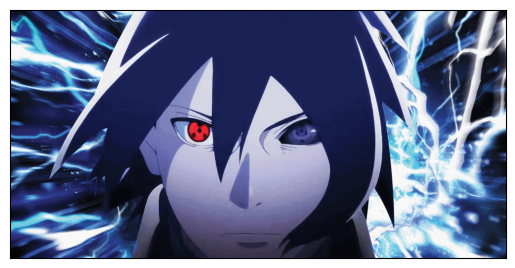

In [9]:
def cmyk_para_rgb(imagem_cmyk: np.ndarray):
    altura, largura, _ = imagem_cmyk.shape

    imagem_rgb = np.zeros((altura, largura, 3), dtype=np.uint8)

    for i in range(altura):
        for j in range(largura):
            c, m, y, k = imagem_cmyk[i, j]

            r_ = (1 - c) * (1 - k)
            g_ = (1 - m) * (1 - k)
            b_ = (1 - y) * (1 - k)

            R = int(round(r_ * 255))
            G = int(round(g_ * 255))
            B = int(round(b_ * 255))

            imagem_rgb[i, j] = [R, G, B]

    return imagem_rgb
cmly_rgb = cmyk_para_rgb(imagem_cmyk)
plt.imshow(cmly_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

## Item C:
- RGB para HSV

**Vale salientar que os valores de padrão HSV variam de biblioteca para biblioteca.**

### Padrão Matemático (Biblioteca colorsys)
- H ∈ [0,360) (em graus)
- S ∈ [0,1]
- V ∈ [0,1]

### Padrão OpenCV
- H ∈ [0,179) (em graus)
- S ∈ [0,255]
- V ∈ [0,255]

### Padrão da Fórmula Entregue
- H ∈ [0,360) (em graus)
- S ∈ [0,1]
- V ∈ [0,255]

- Diante disso a formula entregua não é compativel com nem uma das biblioteca, mas vamos fazer 2 formulas ontem um é o padrão da formula entregue e a outra será a mesma função porém com o V normalizado para verificarmos se está correto a transformação.

In [10]:
def transformar_rgb_to_hsv(imagem) -> np.array:
    '''
    Função para transformar imagem RGB em
    escala de HSV
    '''
    nova_imagem = []
    for linha_pixels in imagem:
      array_linha = []
      for r,g,b in linha_pixels:
         valor_max_rgb = max(r,g,b)
         valor_min_rgb = min(r,g,b)
         if r >= g and r >= b:
            color_max = 'R'
         elif g >= r and g >= b:
            color_max = 'G'
         elif b >= g and b >= r:
            color_max = 'B'

         if  valor_max_rgb - valor_min_rgb == 0:
            h = 0
         elif color_max == 'R' and g >= b:
            h = 60 * ((g-b)/(valor_max_rgb - valor_min_rgb))
         elif color_max == 'R' and g < b:
            h = 60 * ((g-b)/(valor_max_rgb - valor_min_rgb)) + 360
         elif color_max == 'G':
            h = 60 * ((b-r)/(valor_max_rgb - valor_min_rgb)) + 120
         elif color_max == 'B':
            h = 60 * ((r-g)/(valor_max_rgb - valor_min_rgb)) + 240

         if max(r,g,b) > 0:
            s = (valor_max_rgb - valor_min_rgb)/valor_max_rgb
         elif max(r,g,b) == 0:
            s = 0

         v = max(r,g,b)/255

         array_linha.append([h,s,v])
      nova_imagem.append(array_linha)
    return np.array(nova_imagem)

- Aplicando função

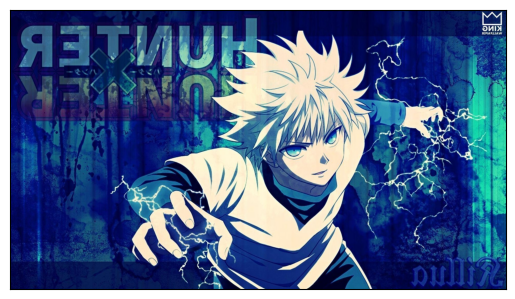

<ipython-input-10-de9e86c13c27>:28: RuntimeWarning: overflow encountered in scalar subtract
  h = 60 * ((r-g)/(valor_max_rgb - valor_min_rgb)) + 240
<ipython-input-10-de9e86c13c27>:26: RuntimeWarning: overflow encountered in scalar subtract
  h = 60 * ((b-r)/(valor_max_rgb - valor_min_rgb)) + 120
<ipython-input-10-de9e86c13c27>:24: RuntimeWarning: overflow encountered in scalar subtract
  h = 60 * ((g-b)/(valor_max_rgb - valor_min_rgb)) + 360


array([[[2.40000000e+02, 1.00000000e+00, 2.19607843e-01],
        [5.03793103e+02, 1.00000000e+00, 2.27450980e-01],
        [4.98305085e+02, 9.83333333e-01, 2.35294118e-01],
        ...,
        [5.65531915e+02, 9.79166667e-01, 1.88235294e-01],
        [5.65531915e+02, 9.40000000e-01, 1.96078431e-01],
        [5.65531915e+02, 8.86792453e-01, 2.07843137e-01]],

       [[5.03793103e+02, 1.00000000e+00, 2.27450980e-01],
        [4.98305085e+02, 9.83333333e-01, 2.35294118e-01],
        [4.98305085e+02, 9.51612903e-01, 2.43137255e-01],
        ...,
        [5.30769231e+02, 8.52459016e-01, 2.39215686e-01],
        [5.30769231e+02, 8.96551724e-01, 2.27450980e-01],
        [5.30769231e+02, 9.12280702e-01, 2.23529412e-01]],

       [[4.79047619e+02, 1.00000000e+00, 2.47058824e-01],
        [4.79047619e+02, 9.69230769e-01, 2.54901961e-01],
        [4.79047619e+02, 9.54545455e-01, 2.58823529e-01],
        ...,
        [4.74285714e+02, 7.50000000e-01, 3.29411765e-01],
        [4.74285714e+02, 7.97

In [11]:
img = cv.imread('/content/R.jpeg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()
img_hsv = transformar_rgb_to_hsv(img)
img_hsv

- Validando função

In [12]:
# Função da colorsys que transforma RGV -> HSV
def rgb_to_hsv_lib(r, g, b):
    return colorsys.rgb_to_hsv(r/255, g/255, b/255)

def meu_rgb_to_hsv(r, g, b):
    ''' Pegamos um treço da função original e aplicamos
    a normalização em V'''
    valor_max_rgb = max(r,g,b)
    valor_min_rgb = min(r,g,b)
    if r >= g and r >= b:
      color_max = 'R'
    elif g >= r and g >= b:
      color_max = 'G'
    elif b >= g and b >= r:
      color_max = 'B'

    if  valor_max_rgb - valor_min_rgb == 0:
      h = 0
    elif color_max == 'R' and g >= b:
      h = 60 * ((g-b)/(valor_max_rgb - valor_min_rgb))
    elif color_max == 'R' and g < b:
      h = 60 * ((g-b)/(valor_max_rgb - valor_min_rgb)) + 360
    elif color_max == 'G':
      h = 60 * ((b-r)/(valor_max_rgb - valor_min_rgb)) + 120
    elif color_max == 'B':
      h = 60 * ((r-g)/(valor_max_rgb - valor_min_rgb)) + 240

    if max(r,g,b) > 0:
      s = (valor_max_rgb - valor_min_rgb)/valor_max_rgb
    elif max(r,g,b) == 0:
      s = 0
    # Normalizando o valor de V
    v = max(r,g,b)/255
    return (h,s,v)

# Vamos testar algumas cores
cores_teste = [
    (0, 0, 0),       # preto
    (255, 255, 255), # branco
    (255, 0, 0),     # vermelho
    (0, 255, 0),     # verde
    (0, 0, 255),     # azul
    (255, 255, 0),   # amarelo
    (255, 128, 64),  # laranja "médio"
]

for (r, g, b) in cores_teste:
    # HSV via colorsys (em 0..1)
    h_lib, s_lib, v_lib = rgb_to_hsv_lib(r, g, b)
    h_lib_deg = h_lib * 360
    # HSV pela sua função
    h_minha, s_minha, v_minha = meu_rgb_to_hsv(r, g, b)

    print(f"RGB({r},{g},{b}) -> "
          f"MinhaF.: H={h_minha:.2f}, S={s_minha:.2f}, V={v_minha:.2f} | "
          f"colorsys: H={h_lib_deg:.2f}, S={s_lib:.2f}, V={v_lib:.2f}")

RGB(0,0,0) -> MinhaF.: H=0.00, S=0.00, V=0.00 | colorsys: H=0.00, S=0.00, V=0.00
RGB(255,255,255) -> MinhaF.: H=0.00, S=0.00, V=1.00 | colorsys: H=0.00, S=0.00, V=1.00
RGB(255,0,0) -> MinhaF.: H=0.00, S=1.00, V=1.00 | colorsys: H=0.00, S=1.00, V=1.00
RGB(0,255,0) -> MinhaF.: H=120.00, S=1.00, V=1.00 | colorsys: H=120.00, S=1.00, V=1.00
RGB(0,0,255) -> MinhaF.: H=240.00, S=1.00, V=1.00 | colorsys: H=240.00, S=1.00, V=1.00
RGB(255,255,0) -> MinhaF.: H=60.00, S=1.00, V=1.00 | colorsys: H=60.00, S=1.00, V=1.00
RGB(255,128,64) -> MinhaF.: H=20.10, S=0.75, V=1.00 | colorsys: H=20.10, S=0.75, V=1.00
